In [21]:
import pandas as pd, pickle, numpy as np, matplotlib.pyplot as plt, matplotlib.dates as mdates, matplotlib as mpl
import matplotlib.lines as mlines

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_rows', 500)

In [22]:
with open('covid_data.p','rb') as f:
    data = pickle.load(f)

## Cases and Deaths by Source

### Cases

In [310]:
# Make column names the same and melt the data at the beginning

# Move start date back by the length of the average for ave graphs?

# Low and High Income versions
# Low and High density versions

# How different by County

# Show social distancing per unit population density, does it expain ave daily deaths per population densitiy difference?

/home/doby/.local/share/virtualenvs/covid-0KkTrqeD/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


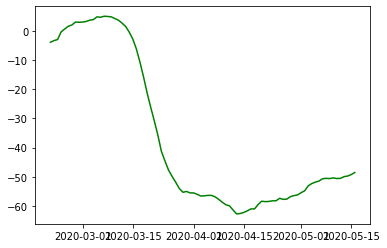

In [315]:
df = pd.DataFrame()
df = data[(data.date >= '2020-01-01') & (data.date <= '2020-06-10') & (data.state_code == 'NY')]
df.loc[:,'retail_and_recreation_percent_change_from_baseline_goog_st'] = df["retail_and_recreation_percent_change_from_baseline_goog_st"].astype(float)
df.loc[:,'workplaces_percent_change_from_baseline_goog_st'] = df["workplaces_percent_change_from_baseline_goog_st"].astype(float)
df = df.drop_duplicates(['date']).reset_index()
df = df.sort_values(by='date')
df['mobility_change_st'] = df[
    ['date','retail_and_recreation_percent_change_from_baseline_goog_st','workplaces_percent_change_from_baseline_goog_st']
].mean(axis=1).rolling(window=7).mean()

plt.plot(df['date'], df['mobility_change_st'], color='green')
plt.show()

In [335]:
def stateGraphs(data, state, case_col, death_col, start_date, end_date, rolling_ave):

    fig = plt.figure(constrained_layout=True, figsize=(12,6))
    gs = fig.add_gridspec(2,2)

    ### PLOT 1 -------------------
    ## Cumulative Cases and Deaths

    # Set up subplot, axis and titles
    ax1 = fig.add_subplot(gs[0,0])
    ax1.set_title('Cumulative Cases and Deaths')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Cases')
    ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    # Data manipulation
    df = data[(data.date >= start_date) & (data.date <= end_date) & (data.state_code == state)]
    df = df.groupby(['date'])[case_col].agg('sum').reset_index()

    # Plot first axis
    ax1.plot(df["date"], df[case_col], color='blue')

    # Set second axis on same subplot
    ax2 = ax1.twinx()
    ax2.set_ylabel('Deaths')
    ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    # Data manipulation for second plot
    df = data[(data.date >= start_date) & (data.date <= end_date) & (data.state_code == state)]
    df = df.groupby(['date'])[death_col].agg('sum').reset_index()

    # Plot second axis
    ax2.plot(df["date"], df[death_col], color='red')

    # Fix the date labels for both plots
    ax2.xaxis.set_major_locator(mdates.MonthLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax2.xaxis.set_minor_locator(mdates.DayLocator())

    # Put on the legend
    red_line = mlines.Line2D([],[], color='blue', label='Cases')
    blue_line = mlines.Line2D([],[], color='red', label='Deaths')
    plt.legend(handles=[red_line, blue_line], loc='upper left')

    ### PLOT 2 -------------------
    ## Average Daily Cases and Deaths

    # Set up subplot, axis and titles
    ax1 = fig.add_subplot(gs[0,1])
    ax1.set_title('Average Daily Cases and Deaths')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Cases')
    ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
    # x-axis uniform
    ax1.plot(df["date"],  pd.DataFrame(0, index=np.arange(len(df)), columns=['test']), color='white')

    # Data manipulation
    df = data[(data.date >= start_date) & (data.date <= end_date) & (data.state_code == state)]
    df = df.groupby(['date'])[case_col].agg('sum').reset_index()
    df[case_col] = df[case_col].diff().rolling(window=rolling_ave).mean() # ROLLING AVE IS HERE

    # Plot first axis
    ax1.plot(df["date"], df[case_col], color='blue')

    # Set second axis on same subplot
    ax2 = ax1.twinx()
    ax2.set_ylabel('Deaths')
    ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    # Data manipulation
    df = data[(data.date >= start_date) & (data.date <= end_date) & (data.state_code == state)]
    df = df.groupby(['date'])[death_col].agg('sum').reset_index()
    df[death_col] = df[death_col].diff().rolling(window=rolling_ave).mean()

    # Plot second axis
    ax2.plot(df["date"], df[death_col], color='red')

    # Fix the date labels for both plots
    ax2.xaxis.set_major_locator(mdates.MonthLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax2.xaxis.set_minor_locator(mdates.DayLocator())

    # Add legend
    red_line = mlines.Line2D([],[], color='blue', label='Cases')
    blue_line = mlines.Line2D([],[], color='red', label='Deaths')
    plt.legend(handles=[red_line, blue_line], loc='upper left')


    ### PLOT 3 -------------------
    ## Mobility

    # Set up subplot, axis and titles
    ax1 = fig.add_subplot(gs[1,0])
    ax1.set_title('Change in Mobility')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Change in Mobility')
    ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    
    # x-axis uniform
    ax1.plot(df["date"],  pd.DataFrame(0, index=np.arange(len(df)), columns=['test']), color='white')

    # Data manipulation
    df = data[(data.date >= start_date) & (data.date <= end_date) & (data.state_code == state)]
    df.loc[:,'retail_and_recreation_percent_change_from_baseline_goog_st'] = df["retail_and_recreation_percent_change_from_baseline_goog_st"].astype(float)
    df.loc[:,'workplaces_percent_change_from_baseline_goog_st'] = df["workplaces_percent_change_from_baseline_goog_st"].astype(float)
    df = df.drop_duplicates(['date']).reset_index()
    df = df.sort_values(by='date')
    df['mobility_change_st'] = df[
        ['date','retail_and_recreation_percent_change_from_baseline_goog_st','workplaces_percent_change_from_baseline_goog_st']
    ].mean(axis=1).rolling(window=7).mean()

    # Plot first axis
    ax1.plot(df['date'], df['mobility_change_st'], color='green')

    # Set second axis on same subplot
    ax2 = ax1.twinx()
    ax2.set_ylabel('Deaths')
    ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

    # Data manipulation
    df = data[(data.date >= start_date) & (data.date <= end_date) & (data.state_code == state)]
    df = df.groupby(['date'])[death_col].agg('sum').reset_index()
    df[death_col] = df[death_col].diff().rolling(window=rolling_ave).mean() # ROLLING AVE IS HERE

    # Plot second axis
    ax2.plot(df["date"], df[death_col], color='red')

    # Format date axis
    ax2.xaxis.set_major_locator(mdates.MonthLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax2.xaxis.set_minor_locator(mdates.DayLocator())

    # Add legend
    red_line = mlines.Line2D([],[], color='green', label='Mobility Change')
    blue_line = mlines.Line2D([],[], color='red', label='Ave Daily Deaths')
    plt.legend(handles=[red_line, blue_line], loc='upper left')



    ### PLOT 4 -------------------
    ## Deaths per 100k

    # Set up subplot, axis and titles
    ax1 = fig.add_subplot(gs[1,1])
    ax1.set_title('Deaths per 100k')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total')
    ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
    
    # x-axis uniform
    ax1.plot(df["date"],  pd.DataFrame(0, index=np.arange(len(df)), columns=['test']), color='white')

    # Data Manipulation
    df = data[(data.date >= start_date) & (data.date <= end_date) & (data.date <= end_date) &(data.state_code == state)]
    df = df.groupby(['date'])['pop_total',death_col].agg('sum').reset_index()
    df['death_per_100k'] = ((df[death_col]/df['pop_total'])*100000).rolling(window=rolling_ave).mean() # ROLLING AVE IS HERE

    # Plot first axis
    ax1.plot(df['date'], df['death_per_100k'], color='maroon')

    # Set second axis on same subplot
    ax2 = ax1.twinx()
    ax2.set_ylabel('Ave Daily')
    ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))

    # Data manipulation
    df = data[(data.date >= start_date) & (data.date <= end_date) & (data.state_code == state)]
    df = df.groupby(['date'])['pop_total',death_col].agg('sum').reset_index()
    df['death_per_100k'] = ((df[death_col]/df['pop_total'])*100000).rolling(window=rolling_ave).mean() # ROLLING AVE IS HERE
    df['death_per_100k'] = df['death_per_100k'].diff() 

    # Plot second axis
    ax2.plot(df['date'], df['death_per_100k'], color='red')

    # Format date axis
    ax2.xaxis.set_major_locator(mdates.MonthLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax2.xaxis.set_minor_locator(mdates.DayLocator())

    # Add legend
    red_line = mlines.Line2D([],[], color='maroon', label='Total')
    blue_line = mlines.Line2D([],[], color='red', label='Ave Daily')
    plt.legend(handles=[red_line, blue_line], loc='upper left')



/home/doby/.local/share/virtualenvs/covid-0KkTrqeD/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/doby/.local/share/virtualenvs/covid-0KkTrqeD/lib/python3.6/site-packages/ipykernel_launcher.py:156: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/home/doby/.local/share/virtualenvs/covid-0KkTrqeD/lib/python3.6/site-packages/ipykernel_launcher.py:169: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


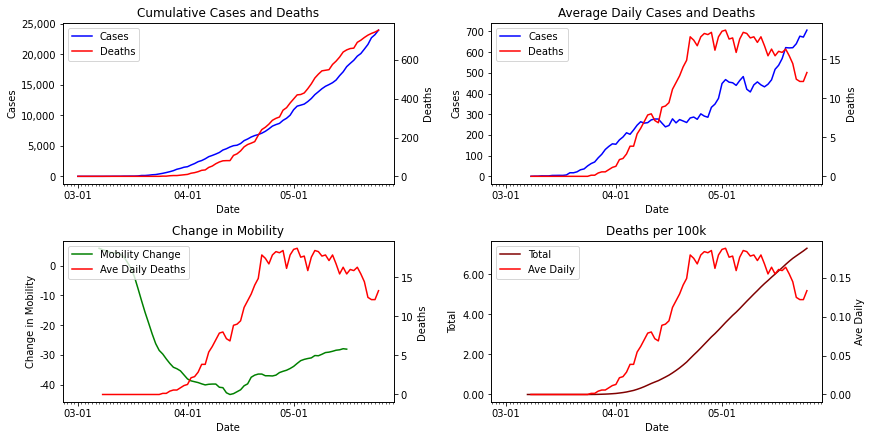

In [336]:
stateGraphs(data, 'NC','confirmed_cdc','deaths_cdc', '2020-03-01', '2020-05-26', 7)

In [341]:
states = ['NY','NJ','MA','IL','MI']
#states = ['IL','MI','NC','SC','GA']
case_col = 'confirmed_cdc'
death_col = 'deaths_cdc'
start_date = '2020-03-01'
end_date = '2020-05-22'
rolling_ave = 14

/home/doby/.local/share/virtualenvs/covid-0KkTrqeD/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/doby/.local/share/virtualenvs/covid-0KkTrqeD/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/doby/.local/share/virtualenvs/covid-0KkTrqeD/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

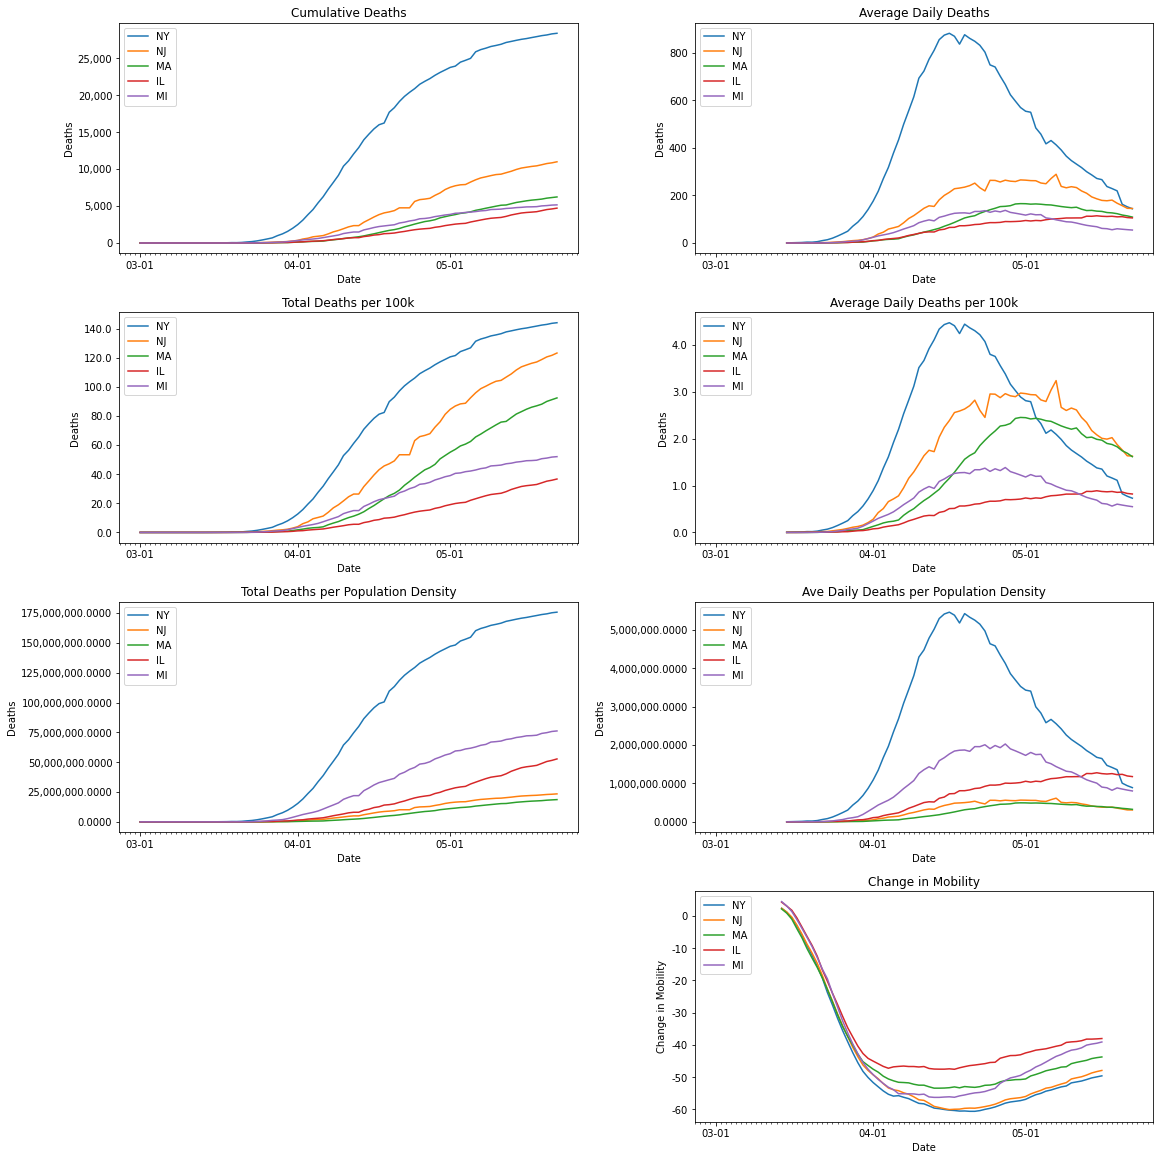

In [342]:
fig = plt.figure(constrained_layout=True, figsize=(16,16))
gs = fig.add_gridspec(4,2)

### PLOT 1 -------------------
## Cumulative Cases and Deaths

# Set up subplot, axis and titles
ax1 = fig.add_subplot(gs[0,0])
ax1.set_title('Cumulative Deaths')
ax1.set_xlabel('Date')
ax1.set_ylabel('Deaths')
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

legend_lines = []
i = 0
for state in states:
    # Data manipulation
    df = data[(data.date >= start_date) & (data.date <= end_date) &(data.state_code == state)]
    df = df.groupby(['date'])[death_col].agg('sum').reset_index()
    # Plot 
    ax1.plot(df["date"], df[death_col], color='C'+str(i))
    legend_line = mlines.Line2D([],[], color='C'+str(i), label=state)
    legend_lines.append(legend_line)
    i+=1

# Fix the date labels for both plots
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())

# Put on the legend
plt.legend(handles=legend_lines, loc='upper left')


### PLOT 2 -------------------
## Mobility

# Set up subplot, axis and titles
ax1 = fig.add_subplot(gs[3,1])
ax1.set_title('Change in Mobility')
ax1.set_xlabel('Date')
ax1.set_ylabel('Change in Mobility')
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax1.plot(df["date"],  pd.DataFrame(0, index=np.arange(len(df)), columns=['test']), color='white')

legend_lines = []
i = 0
for state in states:
    # Data manipulation
    df = data[(data.date >= start_date) & (data.date <= end_date) & (data.state_code == state)]
    col = df[["retail_and_recreation_percent_change_from_baseline_goog_st",
                "workplaces_percent_change_from_baseline_goog_st"]].apply(pd.to_numeric)
    df['mobility_change'] = col.mean(axis=1)
    df = df.groupby(['date'])['mobility_change'].agg('mean').reset_index()
    df['mobility_change'] = df['mobility_change'].rolling(window=rolling_ave).mean()
    
    # Plot 
    ax1.plot(df["date"], df['mobility_change'], color='C'+str(i))
    legend_line = mlines.Line2D([],[], color='C'+str(i), label=state)
    legend_lines.append(legend_line)
    i+=1
   
    
# Fix the date labels for both plots
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())

# Put on the legend
plt.legend(handles=legend_lines, loc='upper left')



### PLOT 3 -------------------
## Average Daily Deaths

# Set up subplot, axis and titles
ax1 = fig.add_subplot(gs[0,1])
ax1.set_title('Average Daily Deaths')
ax1.set_xlabel('Date')
ax1.set_ylabel('Deaths')
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax1.plot(df["date"],  pd.DataFrame(0, index=np.arange(len(df)), columns=['test']), color='white')

legend_lines = []
i = 0
for state in states:
    # Data manipulation
    df = data[(data.date >= start_date) & (data.date <= end_date)& (data.state_code == state)]
    df = df.groupby(['date'])[death_col].agg('sum').reset_index()
    df[death_col] = df[death_col].diff().rolling(window=rolling_ave).mean() # ROLLING AVE IS HERE
    # Plot 
    ax1.plot(df["date"], df[death_col], color='C'+str(i))
    legend_line = mlines.Line2D([],[], color='C'+str(i), label=state)
    legend_lines.append(legend_line)
    i+=1

# Fix the date labels for both plots
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())

# Put on the legend
plt.legend(handles=legend_lines, loc='upper left')



### PLOT 4 -------------------
## Ave daily death per 100k

# Set up subplot, axis and titles
ax1 = fig.add_subplot(gs[1,1])
ax1.set_title('Average Daily Deaths per 100k')
ax1.set_xlabel('Date')
ax1.set_ylabel('Deaths')
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))

ax1.plot(df["date"],  pd.DataFrame(0, index=np.arange(len(df)), columns=['test']), color='white')

legend_lines = []
i = 0
for state in states:
    # Data manipulation
    df = data[(data.date >= start_date) & (data.date <= end_date) & (data.state_code == state)]
    df = df.groupby(['date'])['pop_total',death_col].agg('sum').reset_index()
    df['death_per_100k'] = ((df[death_col]/df['pop_total'])*100000).rolling(window=rolling_ave).mean() # ROLLING AVE IS HERE
    df['death_per_100k'] = df['death_per_100k'].diff() 
    # Plot 
    ax1.plot(df["date"], df['death_per_100k'], color='C'+str(i))
    legend_line = mlines.Line2D([],[], color='C'+str(i), label=state)
    legend_lines.append(legend_line)
    i+=1

# Fix the date labels for both plots
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())

# Put on the legend
plt.legend(handles=legend_lines, loc='upper left')


### PLOT 5 -------------------
## Total death per 100k

# Set up subplot, axis and titles
ax1 = fig.add_subplot(gs[1,0])
ax1.set_title('Total Deaths per 100k')
ax1.set_xlabel('Date')
ax1.set_ylabel('Deaths')
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))

ax1.plot(df["date"],  pd.DataFrame(0, index=np.arange(len(df)), columns=['test']), color='white')

legend_lines = []
i = 0
for state in states:
    # Data manipulation
    df = data[(data.date >= start_date) & (data.date <= end_date) & (data.state_code == state)]
    df = df.groupby(['date'])['pop_total',death_col].agg('sum').reset_index()
    df['death_per_100k'] = ((df[death_col]/df['pop_total'])*100000).rolling(window=1).mean() # ROLLING AVE IS HERE
    # Plot 
    ax1.plot(df["date"], df['death_per_100k'], color='C'+str(i))
    legend_line = mlines.Line2D([],[], color='C'+str(i), label=state)
    legend_lines.append(legend_line)
    i+=1

# Fix the date labels for both plots
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())

# Put on the legend
plt.legend(handles=legend_lines, loc='upper left')



### PLOT 6 -------------------
## Total death per 100k per population density (per area)

# Set up subplot, axis and titles
ax1 = fig.add_subplot(gs[2,0])
ax1.set_title('Total Deaths per Population Density')
ax1.set_xlabel('Date')
ax1.set_ylabel('Deaths')
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.4f}'))

ax1.plot(df["date"],  pd.DataFrame(0, index=np.arange(len(df)), columns=['test']), color='white')

legend_lines = []
i = 0
for state in states:
    # Data manipulation
    df = data[(data.date >= start_date) & (data.date <= end_date) & (data.state_code == state)]
    df = df.groupby(['date'])['pop_total','amount_land',death_col].agg('sum').reset_index()
    df['pop_density'] = (df['pop_total']/df['amount_land'])
    df['death_per_100k'] = ((df[death_col]/df['pop_total'])*100000).rolling(window=rolling_ave).mean() # ROLLING AVE IS HERE
    df['death_density'] = df[death_col]/df['pop_density']
    # Plot 
    ax1.plot(df["date"], df['death_density'], color='C'+str(i))
    legend_line = mlines.Line2D([],[], color='C'+str(i), label=state)
    legend_lines.append(legend_line)
    i+=1

# Fix the date labels for both plots
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())

# Put on the legend
plt.legend(handles=legend_lines, loc='upper left')


### PLOT 7 -------------------
## Total death per 100k per population density (per area)

# Set up subplot, axis and titles
ax1 = fig.add_subplot(gs[2,1])
ax1.set_title('Ave Daily Deaths per Population Density')
ax1.set_xlabel('Date')
ax1.set_ylabel('Deaths')
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.4f}'))

ax1.plot(df["date"],  pd.DataFrame(0, index=np.arange(len(df)), columns=['test']), color='white')

legend_lines = []
i = 0
for state in states:
    # Data manipulation
    df = data[(data.date >= start_date) & (data.date <= end_date) & (data.state_code == state)]
    df = df.groupby(['date'])['pop_total','amount_land',death_col].agg('sum').reset_index()
    df['pop_density'] = (df['pop_total']/df['amount_land'])
    df['death_per_100k'] = ((df[death_col]/df['pop_total'])*100000).rolling(window=rolling_ave).mean() # ROLLING AVE IS HERE
    df['death_density'] = df[death_col].diff().rolling(window=rolling_ave).mean()/df['pop_density']
    # Plot 
    ax1.plot(df["date"], df['death_density'], color='C'+str(i))
    legend_line = mlines.Line2D([],[], color='C'+str(i), label=state)
    legend_lines.append(legend_line)
    i+=1

# Fix the date labels for both plots
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator())

# Put on the legend
plt.legend(handles=legend_lines, loc='upper left')

In [28]:
# Deaths per unit of population density at county level

# When did each place first hit 50 deaths? when was that in relation to social distancing?

# at county level, only include counties with material death counts.
# will the curves look even more comparable at the county level due to a more homogonouse population density?

# The chenge in mobility compared to deaths per person per density reveals the more mobility reduction, the more deaths.
# This means that becuase of our 'reactive' behavior- the mobility patterns can be used to predict the intensity
# Can use that assumption to places we dont have data on, and predict the spread there.

# The clusters in deaths per area tell a story about how the disease spreads.

# In bigger areas such as new jersey, the deaths grew higher over a longer period.

# For the second cluster of states, the graphs are stable and relationships are preserved, so it is not density or population explaining the differences
# For the first cluster of states, the graphs change wildley and even into a different order, so people densities and volumes are playing a key role

In [29]:
# Social distitancing is not that useful to explain the risk, maybe cumulative days?
# Cumulative days in relation to a key time?


In [30]:
# Add two-three week averge social distancing as comparison point
# Add income slices

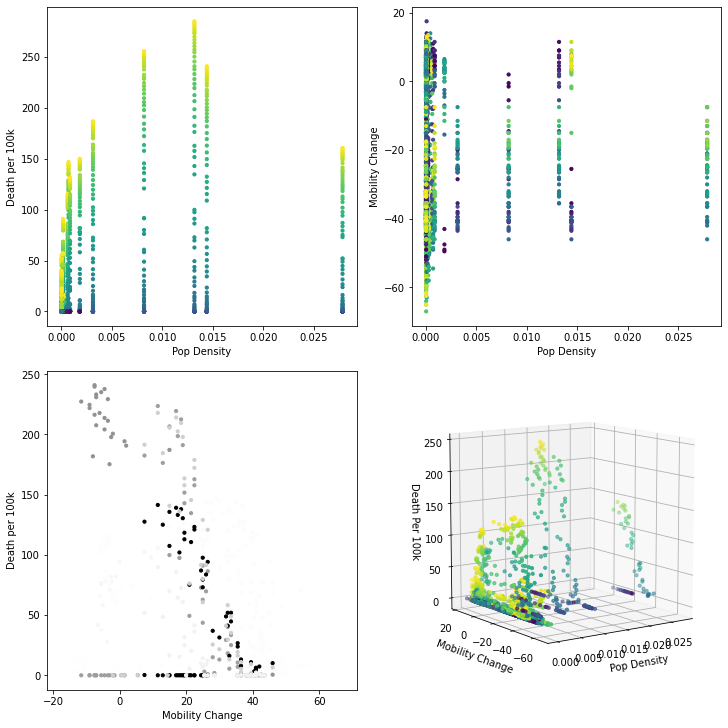

In [343]:
## Data manipulation
# Create Columns
df = data
df = df[df['state_code'].isin(['NY'])].reset_index()
df['death_per_100k'] = ((df[death_col]/df['pop_total'])*100000) 
df['pop_density'] = (df['pop_total']/df['amount_land'])
col = data[["retail_and_recreation_percent_change_from_baseline_goog_st",
                "workplaces_percent_change_from_baseline_goog_st"]].apply(pd.to_numeric)
df['mobility_change'] = col.mean(axis=1)

# Filter Data
start_date = '2020-03-01'
end_date = '2020-05-16'
df = df[(df.date >= start_date) & (df.date <= end_date)]
#df = df[(df['pop_density'] > 0 ) & (df['pop_density'] > 0) & 
#        (df['death_per_100k'] > 0) & (df['death_per_100k'] > 0) &
#       (df[death_col] > 0)]

fig = plt.figure(constrained_layout=True, figsize=(10,10))
gs = fig.add_gridspec(2,2)

# Create plots
ax1 = fig.add_subplot(gs[0,0])
ax1.set_title('')
ax1.set_xlabel('Pop Density')
ax1.set_ylabel('Death per 100k')
ax1.scatter(df["pop_density"], df['death_per_100k'], c=df['date'], s=10)

ax2 = fig.add_subplot(gs[1,0])
ax2.set_title('')
ax2.set_xlabel('Mobility Change')
ax2.set_ylabel('Death per 100k')
ax2.scatter(-df["mobility_change"], df['death_per_100k'], c=df['pop_density'], s=10, cmap='Greys')

ax3 = fig.add_subplot(gs[0,1])
ax3.set_title('')
ax3.set_xlabel('Pop Density')
ax3.set_ylabel('Mobility Change')
ax3.scatter(df["pop_density"], df['mobility_change'], c=df['date'], s=10)


ax4 = fig.add_subplot(gs[1,1], projection='3d')
ax4.set_title('')
ax4.set_xlabel('Pop Density')
ax4.set_ylabel('Mobility Change')
ax4.set_zlabel('Death Per 100k')
ax4.scatter(df['pop_density'], df['mobility_change'],df['death_per_100k'],c=df['date'], s=10)
ax4.view_init(10,55+180)


In [344]:
df[['county_name','death_per_100k','pop_density']]

,county_name,death_per_100k,pop_density
0,Unknown,NaN,NaN
1,Unknown,NaN,NaN
2,Unknown,NaN,NaN
3,Unknown,NaN,NaN
4,Unknown,NaN,NaN
...,...,...,...
8071,Richmond County,181.271180,0.003141
8072,Richmond County,182.538811,0.003141
8073,Richmond County,183.806441,0.003141
8074,Richmond County,186.130431,0.003141


In [345]:
df = data
df = df[df['date'] <= '2020-05-16']
df = df[df['date'] >= '2020-03-01']
#df = df[df['state_code'].isin(['NY','NJ','MI','FL','WA','CA','CT','MA'])].reset_index()
df = df[df['deaths_cdc']>=100]

df['death_per_100k'] = ((df[death_col]/df['pop_total'])*100000) 
df['pop_density'] = (df['pop_total']/df['amount_land'])
df['death_per_density'] = df[death_col]/df['pop_density']*100000
col = data[["retail_and_recreation_percent_change_from_baseline_goog_st",
                "workplaces_percent_change_from_baseline_goog_st"]].apply(pd.to_numeric)
df['mobility_change'] = col.mean(axis=1)

In [346]:
df[['state_code','fips_code','county_name','confirmed_cdc','deaths_cdc',
    'pop_total','amount_land','death_per_100k','pop_density','death_per_density']].sort_values(
    by=['deaths_cdc'], ascending=False).reset_index()

,index,state_code,fips_code,county_name,confirmed_cdc,deaths_cdc,pop_total,amount_land,death_per_100k,pop_density,death_per_density
0,391666,NY,36047,Kings County,51991.0,6278.0,2606852.0,1.808140e+08,240.826867,0.014417,4.354486e+10
1,391665,NY,36047,Kings County,51581.0,6246.0,2606852.0,1.808140e+08,239.599333,0.014417,4.332291e+10
2,391664,NY,36047,Kings County,51095.0,6194.0,2606852.0,1.808140e+08,237.604590,0.014417,4.296223e+10
3,391663,NY,36047,Kings County,50667.0,6127.0,2606852.0,1.808140e+08,235.034440,0.014417,4.249751e+10
4,391662,NY,36047,Kings County,50331.0,6077.0,2606852.0,1.808140e+08,233.116418,0.014417,4.215070e+10
...,...,...,...,...,...,...,...,...,...,...,...
3103,139322,LA,22017,Caddo Parish,1497.0,100.0,253125.0,2.275355e+09,39.506173,0.000111,8.989059e+10
3104,42200,CO,08123,Weld County,1872.0,100.0,NaN,1.032672e+10,NaN,NaN,NaN
3105,42199,CO,08123,Weld County,1836.0,100.0,NaN,1.032672e+10,NaN,NaN,NaN
3106,42198,CO,08123,Weld County,1802.0,100.0,NaN,1.032672e+10,NaN,NaN,NaN


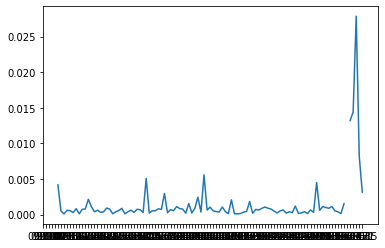

In [347]:
# Differences in population density are exponential
plt.plot(df['fips_code'], df['pop_density'])
plt.show()

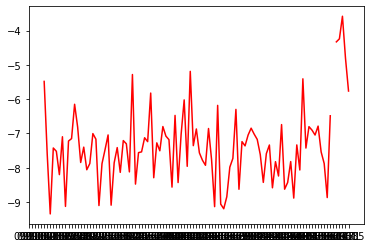

In [348]:
plt.plot(df['fips_code'], np.log(df['pop_density']), color='red')
plt.show()

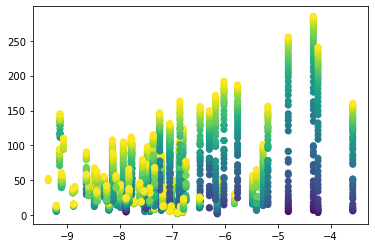

In [351]:
# Population density matters, but it matters like a logarithm
plt.scatter(np.log(df['pop_density']),df['death_per_100k'], c=df['date'])
plt.show()

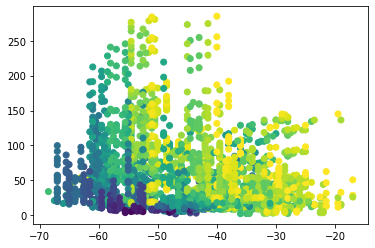

In [350]:
# Population density matters, but it matters like a logarithm
plt.scatter(df['mobility_change'],df['death_per_100k'], c=df['date'])
plt.show()